<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 110px;">
</div>

## <I>ATM663 mesoscale convection
# A brief introduction of moist static energy (MSE) diagram
<hr style="height:2px;">
### <font color='grey'> Author: Wei-Ming Tsai
#### <font color='grey'>Feb 14, 2019 


### Traditional demonstration for sounding : Skew-T 
##### What do we see on a tranditional Skew-T diagam? 
- isobar, isothermal, Td, T, dry adiabats, saturated adiabats, saturated mixing ratio lines ...
- pressure plotted on the vertical axis, with a logarithmic scale (log-P), and temperature plotted skewed, with isothermal lines at 45° to the plot. 

<center><img src="./skewt_explain.gif" width=650 height=650>

##### Some disadvantages when using Skew-T 
- Lower troposhere is fairly squeezed, while **upper levels of less interests occupy a large portion of the diagram**.
- Skewed T, Td and qs lines are hard to eyeball. The plot is too **fuzzy**.
- Informative, but **lack of links to conservation of energy, the core of thermodynamics**.

## <center>A better way to present the atmspheric state: <br>
## <center>Moist static energy diagram


Since we are looking for a way to address energy-based information and obtain a clear deomonstration of atmospheric state as well, let's back to what we learned from thermodyanmics. 
- From the 1st law of thermodynamics and the ideal gas law:

\begin{align}
c_p\frac{dT}{dt} - \alpha\frac{dp}{dt} = Q 
\end{align}

Considering adiabatic processes (Q=0), we can eventaully derive a conserved varaible, **entropy**

\begin{align}
dS = d(c_pln(\theta)) = 0
\end{align}
<center>where $\theta$ is potential temperature, $\theta = T(\frac{p}{p_0})^{\frac{R_d}{C_p}}$

- Recall that **entropy** of a parcel can be defined as a conserved quantity, but its formula contains nonlinear functions, e.g., logarithms of p and T. Entropy itself is a mysterious quantity with a wierd unit of J/kelvin. 


- Also, a **reference** state ($p_0$) should be declared when using entropy and potential temperature ($\theta, \theta_e$). There's no explanation for how references are choosen, just satisfying mathmetical needs.   

- Considering **Q as latent heat release** involved in phase-changing (vapor to liquid), we can derive:
\begin{align}
c_p\frac{dT}{dt} - \alpha \frac{dp}{dt} +L_v\frac{dq_v}{dt} = 0  
\end{align}

Using the **hydrostatic approximation** ($\frac{dp}{dz}=\frac{-1}{\alpha}g$) to convert the 2nd term
\begin{align}
c_p\frac{dT}{dt} - g\frac{dz}{dt} +L_v\frac{dq_v}{dt} = 0  => c_pT + gz + L_vq_v = const
\end{align}

<center>$c_pT+gz+L_vq_v = const$<br>
    
Now we can relate all state variables (T,q,z) to engery-based parameters: 
<center>dry static energy: $\;\;\;\;$ $s=c_pT+gz$ <br>
moist static energy: $\;\;\;\;$ $h=c_pT+gz+L_vq_v$ <br>
saturated moist static energy: $\;\;\;\;$ $h_s=c_pT+gz+L_vq_s(T)$

- Now we have energy-based quantities consisting of T, z, and $q_v$, clear formula without any logarithms. 


- Moist static energy is **conserved during unsaturated and saturated adiabatic processes**, so it's also an ideal quantity for describing the state of moving parcel.


## <center>Moist static energy diagram examples

<center><img src="./mseplot1.png" width="750" height="700">

<center>courtesy of Prof. Mapes

<center><img src="./mseplot2.png" width="750" height="700">

<center><img src="./mseplot3.png" width="750" height="700">

<center><img src="./mseplot4.png" width="750" height="700">

<center><img src="./mseplot6.png" width=750 height=700>

### Python package for MSE diagram: MSEplots
- A Python package built for the moist static energy (MSE) analysis of sounding data/model output with required vertical profiles of thermodynamic parameters as inputs
- Typing "pip install MSEplots-pkg" in the terminal to install the lastest package on PYPI. 

```python
from MSEplots import plots as mpt
: (reading the required input)
mpt.msed_plots(pressure,Temp,q,altitude,ent_rate=np.arange(0,2,0.05),entrain=True)
```

<center><img src='./demo.png' width="650" height="650">

In [7]:
from MSEplots import plots as mpt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [8]:
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2019, 2, 13, 12) # cyclone in the north, bringing heavy rain here
station = 'MFL'

df = WyomingUpperAir.request_data(date, station)
pressure = df['pressure'].values 
Temp = df['temperature'].values 
Temp_dew = df['dewpoint'].values 
altitude = df['height'].values 

from metpy.calc.thermo import *
from metpy.units import units
q = mixing_ratio(saturation_vapor_pressure(Temp_dew*units.degC),pressure*units.mbar)
q = specific_humidity_from_mixing_ratio(q)

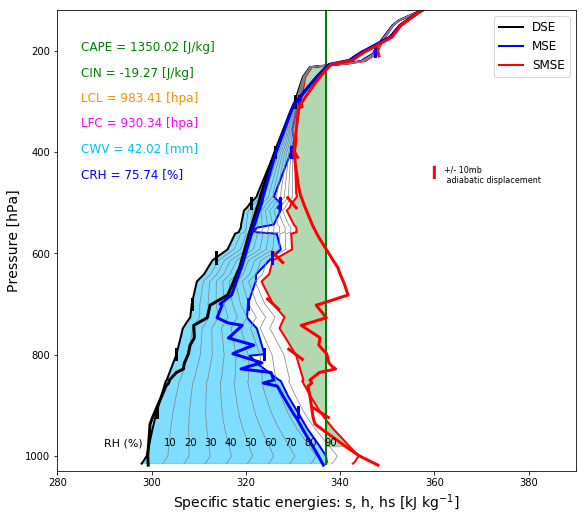

In [9]:
ax = mpt.msed_plots(pressure,Temp,q,altitude,entrain=False)
mpt.add_curves_Wyoming(ax,datetime(2019,2,12,0),'MFL',linewidth=3)

<center><img src="./moistening.png" width=800 height=750>